In [1]:
from pathlib import Path
from IPython.display import Image

from data_utils import load_params, load_results, convert_test_scores_to_sample_scores
from eval import calculate_cf_matrix, plot_cf_matrix, plot_negative_roc
import yaml

# Load data

In [2]:
# import parameters
params_path = Path('./params.yml')
import_params = load_params(params_path, 'import_params')

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_params.import_file_path, import_params)
df_results_image_based

,image_name,category,sample,revolution,trigger,negative_score,prediction,truth
0,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,68,5,6,0.000894,0,0
1,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,13,7,4,0.961880,1,1
2,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,28,1,6,0.172117,0,0
3,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,14,7,10,0.034850,0,0
4,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,7,7,2,0.954496,1,1
...,...,...,...,...,...,...,...,...
718,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,43,4,2,0.979083,1,1
719,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,19,4,9,0.002159,0,0
720,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,36,10,2,0.007070,0,0
721,/home/tonytrieu/datasets/Cilag/C61/C61_Beschae...,Image,48,1,2,0.090558,0,0


# Filter categories and save data frame

In [3]:
# filter relevant categories
include_categories = [
    'Airline',
    'Verformt',
    'BeschStopfen_',
    'MarkStopfen_',
    'PartikelIglo_',
    'FaserStopfen',
    'LyoStopfen',
    'Gut'
]

with open(params_path, 'r') as file:
    params = yaml.safe_load(file)
    export_params = params['export_params']

# df_results_image_based = df_results_image_based[df_results_image_based.category.isin(include_categories)]

# save new data frame to csv file
path_image_based_csv = export_params['export_path'] + r'\image_based_scores.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

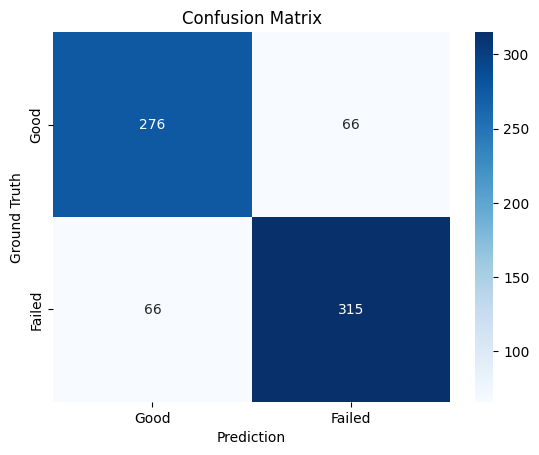

In [4]:
# evaluation parameters
prediction_class_to_value_map = {'Good': 0, 'Failed': 1}
prediction_classes = ['Good', 'Failed']

# creating confusion matrix
y_true = df_results_image_based.truth
y_pred = df_results_image_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
export_path = Path(export_params['export_path'])
save_path_cf_matrix = export_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

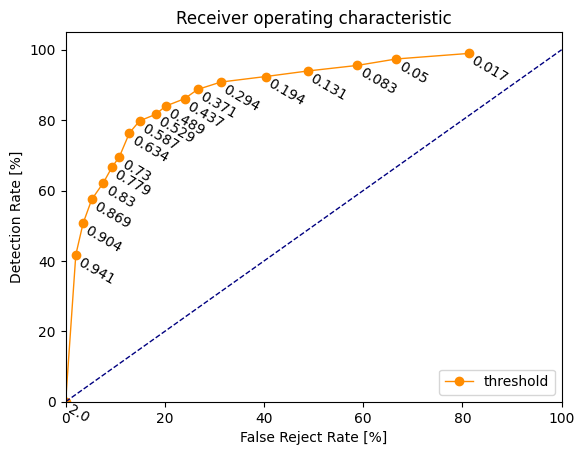

In [5]:
# plotting and saving ROC curve
y_scores = df_results_image_based.negative_score
save_path_ROC_curve = export_path / 'image_based_ROC_curve.png'

plot_negative_roc(y_true, y_scores, save_path_ROC_curve, n = 10, negative_label=1)

# Sample-based evaluation

In [6]:
df_results_sample_based = convert_test_scores_to_sample_scores(df_results_image_based)
df_results_sample_based

negative_score  prediction  truth
category sample revolution                                   
Image    1      5                 0.423227           0      1
                6                 0.437569           0      0
                7                 0.075520           0      0
                8                 0.559862           1      0
                9                 0.000015           0      0
...                                    ...         ...    ...
         75     5                 0.082035           0      0
                6                 0.067366           0      1
                7                 0.874798           1      1
                9                 0.492352           0      0
                10                0.973209           1      0

[454 rows x 3 columns]

In [7]:
# save sample based data frame to csv file
save_path_sample_based_csv= export_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

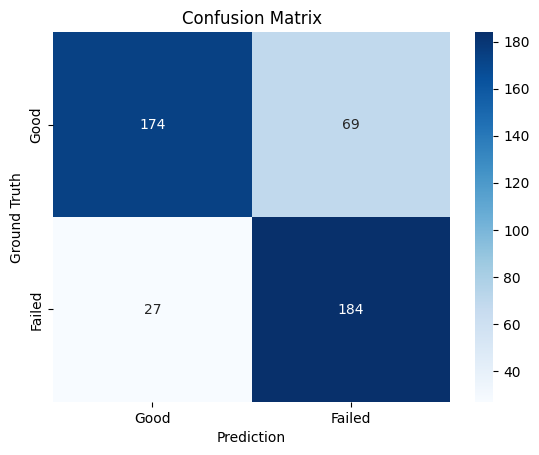

In [8]:
# creating confusion matrix
y_true = df_results_sample_based.truth
y_pred = df_results_sample_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

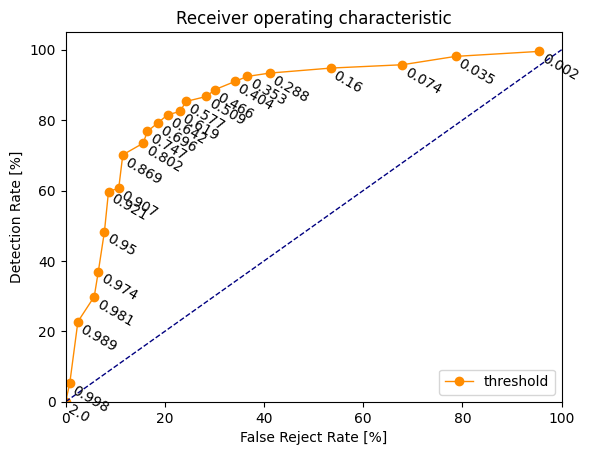

In [10]:
# plotting and saving ROC curve
y_scores = df_results_sample_based.negative_score
save_path_ROC_curve = export_path / 'sample_based_ROC_curve.png'

plot_negative_roc(y_true, y_scores, save_path_ROC_curve, n = 5, negative_label=1)